## Deep Learning 중간고사
* 시험시간: 09:00~10:30분까지<br><br>
* 파일이름 작성방법: 딥러닝_중간고사_학번_성명.ipynb<br>
\- 주의사항: jupyternotebook file을 실행해본 후 upload하세요
* 답안지 제출 
   www.webhard.co.kr<br>
   ID: lindsey<br>
   PW: start<br>
   답안제출 Folder: 올리기전용/딥러닝/중간고사_답안지_폴더"에 답안제출<br><br>
* 빈칸에 프로그램을 작성한 후 실행결과를 제출
* 시험 시간 이후에 upload된 file은 인정하지 않습니다

### [문제 1]
Gradient Descent를 이용하여 다음 함수식의 최소값과 최소값에서 Loss 값을 찾으시오(학습율 $\rho=0.05$)<br>
$Loss(w) = 2(w-3)^4+2$

In [17]:
import numpy as np
import matplotlib.pyplot as plt


def L(w):
    return 2*(w-3)**4 + 2


def grad_L(w):
    return 8*(w-3)**3


def gradient_descent(L, grad_L, w0, learning_rate, MaxIter):
    paths = []   # 비어 있는 list
    

    for i in range(MaxIter):
        w1 = w0 - learning_rate * grad_L(w0)
        print('{0:02d} : {1:5.5f}, {2:6.5f}'.format(i, w1, L(w1)))
        
        w0 = w1
        paths.append(w0)   # 최적값을 찾아가는 각 점을 모은 것임
    return(w0, L(w0), np.array(paths))

wopt, Lopt, paths = gradient_descent(L, grad_L, 4, 0.05, 50)

00 : 3.60000, 2.25920
01 : 3.51360, 2.13917
02 : 3.45941, 2.08909
03 : 3.42062, 2.06260
04 : 3.39086, 2.04668
05 : 3.36697, 2.03627
06 : 3.34720, 2.02906
07 : 3.33046, 2.02385
08 : 3.31603, 2.01995
09 : 3.30340, 2.01695
10 : 3.29223, 2.01459
11 : 3.28225, 2.01269
12 : 3.27325, 2.01115
13 : 3.26509, 2.00988
14 : 3.25764, 2.00881
15 : 3.25080, 2.00791
16 : 3.24449, 2.00715
17 : 3.23864, 2.00649
18 : 3.23321, 2.00592
19 : 3.22813, 2.00542
20 : 3.22339, 2.00498
21 : 3.21893, 2.00459
22 : 3.21473, 2.00425
23 : 3.21077, 2.00395
24 : 3.20702, 2.00367
25 : 3.20347, 2.00343
26 : 3.20010, 2.00321
27 : 3.19690, 2.00301
28 : 3.19385, 2.00282
29 : 3.19093, 2.00266
30 : 3.18815, 2.00251
31 : 3.18548, 2.00237
32 : 3.18293, 2.00224
33 : 3.18048, 2.00212
34 : 3.17813, 2.00201
35 : 3.17587, 2.00191
36 : 3.17369, 2.00182
37 : 3.17160, 2.00173
38 : 3.16958, 2.00165
39 : 3.16763, 2.00158
40 : 3.16574, 2.00151
41 : 3.16392, 2.00144
42 : 3.16216, 2.00138
43 : 3.16045, 2.00133
44 : 3.15880, 2.00127
45 : 3.157

### [문제 2]
다음과 같이 $(X1, X2)$의 조건에서 얻어진 $y$가 있다. <br>
Libraries들을 이용하여 선형회귀모형의 weight parameter를 구하시오

In [1]:
import numpy as np
import pandas as pd
import numpy.random as rnd

X1 = np.random.rand(100, 1) # X=100개의 난수를 생성하여 3를 곱한 수
X2 = np.random.rand(100, 1) # X=100개의 난수를 생성하여 3를 곱한 수
y = 2 + 4*X1  - X2 + np.random.randn(100, 1)  # 생성된 난수 X와 정규분포를 이용해서  y data를 생성
X = np.concatenate((X1, X2), axis=1)
X1.shape, X2.shape, X.shape

((100, 1), (100, 1), (100, 2))

In [2]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
intercept = lin_reg.intercept_  # intercept_는 class내의 내부변수
slope = lin_reg.coef_

print('intercept =\n{}\n'.format(intercept))
print('slope =\n{}\n'.format(slope))

intercept =
[1.92616588]

slope =
[[ 4.3217585  -1.06894734]]



### [문제 3]
XOR는 다음과 같이 input X에 대해 y가 출력되는 문제이다. 다음에 제시된 Deep Neural Network을 이용하여 XOR문제 풀이하시오<br>
$$
\begin{align}
input \ \ Z =&
\left[
\begin{bmatrix}
0 \\
0
\end{bmatrix}
\begin{bmatrix}
0 \\
1
\end{bmatrix}
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\begin{bmatrix}
1 \\
1
\end{bmatrix}
\right]  \\\\
Label \ \ y =& \left[ 0 \ 1 \ 1 \ 0 \right]
\end{align}
$$


 $  $

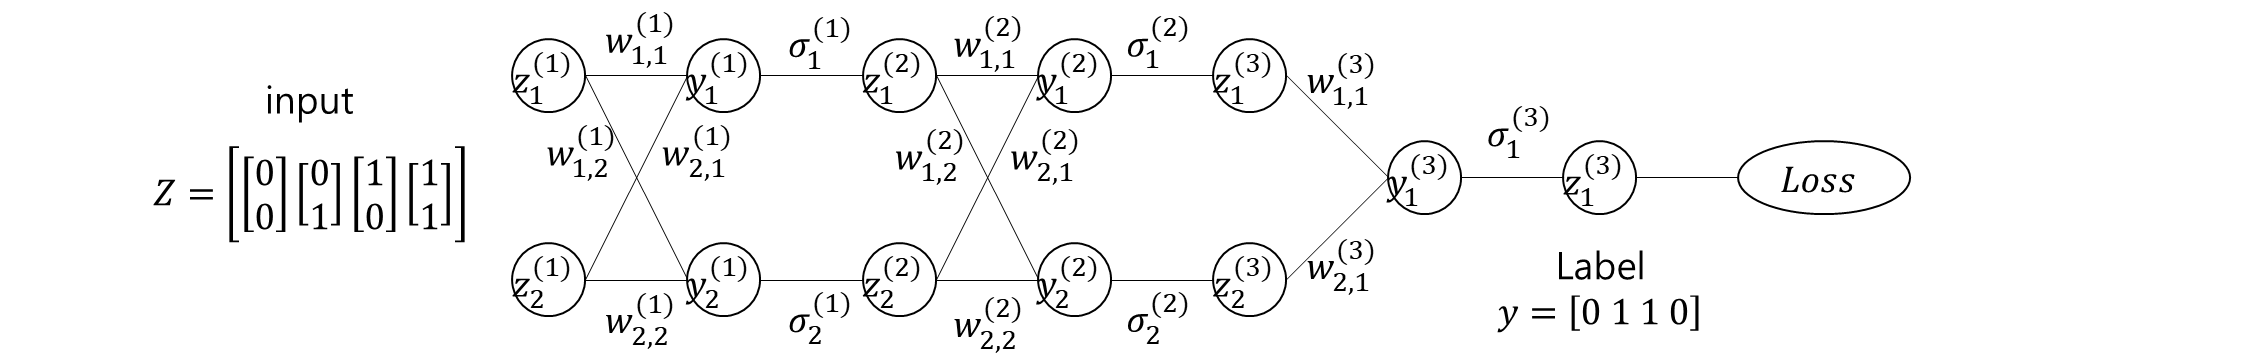

- 학습율: $\rho = 0.1$
- Optimizer: Adam
- epoch: 1000

Layer | Activation Function
:----:|:----:
 1 | Sigmoid
 2 | Sigmoid
 3 | Sigmoid

In [3]:
import tensorflow as tf
import numpy as np

# XOR data
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=2, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mse')

history = model.fit(x, y, epochs=1000, batch_size=1)

model.summary()

print(model.predict(x))

Epoch 1/1000
4/4 [==============================] - 0s 748us/step - loss: 0.3163
Epoch 2/1000
4/4 [==============================] - 0s 427us/step - loss: 0.2646
Epoch 3/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2838
Epoch 4/1000
4/4 [==============================] - 0s 501us/step - loss: 0.2549
Epoch 5/1000
4/4 [==============================] - 0s 747us/step - loss: 0.2679
Epoch 6/1000
4/4 [==============================] - 0s 748us/step - loss: 0.2603
Epoch 7/1000
4/4 [==============================] - 0s 466us/step - loss: 0.2539
Epoch 8/1000
4/4 [==============================] - 0s 499us/step - loss: 0.2543
Epoch 9/1000
4/4 [==============================] - 0s 964us/step - loss: 0.2532
Epoch 10/1000
4/4 [==============================] - 0s 747us/step - loss: 0.2531
Epoch 11/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2515
Epoch 12/1000
4/4 [==============================] - 0s 746us/step - loss: 0.2509
Epoch 13/1000
4/4 [======

4/4 [==============================] - 0s 498us/step - loss: 0.1450
Epoch 102/1000
4/4 [==============================] - 0s 747us/step - loss: 0.1414
Epoch 103/1000
4/4 [==============================] - 0s 748us/step - loss: 0.1357
Epoch 104/1000
4/4 [==============================] - 0s 727us/step - loss: 0.1390
Epoch 105/1000
4/4 [==============================] - 0s 747us/step - loss: 0.1500
Epoch 106/1000
4/4 [==============================] - 0s 392us/step - loss: 0.1374
Epoch 107/1000
4/4 [==============================] - 0s 498us/step - loss: 0.1385
Epoch 108/1000
4/4 [==============================] - 0s 747us/step - loss: 0.1457
Epoch 109/1000
4/4 [==============================] - 0s 601us/step - loss: 0.1360
Epoch 110/1000
4/4 [==============================] - 0s 498us/step - loss: 0.1358
Epoch 111/1000
4/4 [==============================] - 0s 499us/step - loss: 0.1351
Epoch 112/1000
4/4 [==============================] - 0s 707us/step - loss: 0.1376
Epoch 113/1000
4/4 

4/4 [==============================] - 0s 744us/step - loss: 0.1291
Epoch 298/1000
4/4 [==============================] - 0s 848us/step - loss: 0.1324
Epoch 299/1000
4/4 [==============================] - 0s 498us/step - loss: 0.1291
Epoch 300/1000
4/4 [==============================] - 0s 499us/step - loss: 0.1353
Epoch 301/1000
4/4 [==============================] - 0s 748us/step - loss: 0.1353
Epoch 302/1000
4/4 [==============================] - 0s 751us/step - loss: 0.1302
Epoch 303/1000
4/4 [==============================] - 0s 564us/step - loss: 0.1384
Epoch 304/1000
4/4 [==============================] - 0s 748us/step - loss: 0.1296
Epoch 305/1000
4/4 [==============================] - 0s 498us/step - loss: 0.1311
Epoch 306/1000
4/4 [==============================] - 0s 495us/step - loss: 0.1297
Epoch 307/1000
4/4 [==============================] - 0s 498us/step - loss: 0.1324
Epoch 308/1000
4/4 [==============================] - 0s 747us/step - loss: 0.1359
Epoch 309/1000
4/4 

4/4 [==============================] - 0s 498us/step - loss: 0.1281
Epoch 494/1000
4/4 [==============================] - 0s 469us/step - loss: 0.1343
Epoch 495/1000
4/4 [==============================] - 0s 498us/step - loss: 0.1357
Epoch 496/1000
4/4 [==============================] - 0s 747us/step - loss: 0.1343
Epoch 497/1000
4/4 [==============================] - 0s 499us/step - loss: 0.1312
Epoch 498/1000
4/4 [==============================] - 0s 747us/step - loss: 0.1301
Epoch 499/1000
4/4 [==============================] - 0s 499us/step - loss: 0.1303
Epoch 500/1000
4/4 [==============================] - 0s 499us/step - loss: 0.1304
Epoch 501/1000
4/4 [==============================] - 0s 747us/step - loss: 0.1339
Epoch 502/1000
4/4 [==============================] - 0s 497us/step - loss: 0.1294
Epoch 503/1000
4/4 [==============================] - 0s 747us/step - loss: 0.1359
Epoch 504/1000
4/4 [==============================] - 0s 498us/step - loss: 0.1293
Epoch 505/1000
4/4 

4/4 [==============================] - 0s 498us/step - loss: 0.1347
Epoch 690/1000
4/4 [==============================] - 0s 498us/step - loss: 0.1322
Epoch 691/1000
4/4 [==============================] - 0s 747us/step - loss: 0.1308
Epoch 692/1000
4/4 [==============================] - 0s 498us/step - loss: 0.1291
Epoch 693/1000
4/4 [==============================] - 0s 429us/step - loss: 0.1298
Epoch 694/1000
4/4 [==============================] - 0s 498us/step - loss: 0.1269
Epoch 695/1000
4/4 [==============================] - 0s 747us/step - loss: 0.1284
Epoch 696/1000
4/4 [==============================] - 0s 806us/step - loss: 0.1343
Epoch 697/1000
4/4 [==============================] - 0s 498us/step - loss: 0.1310
Epoch 698/1000
4/4 [==============================] - 0s 747us/step - loss: 0.1283
Epoch 699/1000
4/4 [==============================] - 0s 498us/step - loss: 0.1321
Epoch 700/1000
4/4 [==============================] - 0s 498us/step - loss: 0.1295
Epoch 701/1000
4/4 

4/4 [==============================] - 0s 498us/step - loss: 0.1275
Epoch 886/1000
4/4 [==============================] - 0s 498us/step - loss: 0.1270
Epoch 887/1000
4/4 [==============================] - 0s 495us/step - loss: 0.1335
Epoch 888/1000
4/4 [==============================] - 0s 498us/step - loss: 0.1290
Epoch 889/1000
4/4 [==============================] - 0s 745us/step - loss: 0.1333
Epoch 890/1000
4/4 [==============================] - 0s 541us/step - loss: 0.1343
Epoch 891/1000
4/4 [==============================] - 0s 498us/step - loss: 0.1288
Epoch 892/1000
4/4 [==============================] - 0s 499us/step - loss: 0.1280
Epoch 893/1000
4/4 [==============================] - 0s 498us/step - loss: 0.1315
Epoch 894/1000
4/4 [==============================] - 0s 498us/step - loss: 0.1281
Epoch 895/1000
4/4 [==============================] - 0s 496us/step - loss: 0.1297
Epoch 896/1000
4/4 [==============================] - 0s 496us/step - loss: 0.1332
Epoch 897/1000
4/4 

### [문제 4]
문제 3에서 Activation function을 다음과 같이 변경하였다.<br>
학습결과를 제시하고 학습이 잘되지 않는 이유를 간단히 설명하시오

Layer | Activation Function
:----:|:----:
1 | ReLu
2 | ReLu
3 |  Sigmoid

### 학습이 잘되지 않는 이유
* 뉴런의 가중치가 바뀌어 훈련 세트에 있는 모든 샘플에 대해 입력의 가중치 합이 음수가 되면 뉴런이 죽게 됩니다. 가중치 합이 음수이면 ReLu 함수의 그레이디언트가 0이 되므로 경사 하강법이 더는 작동하지 않습니다.

In [7]:
import tensorflow as tf
import numpy as np

# XOR data
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(units=2, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mse')

history = model.fit(x, y, epochs=1000, batch_size=1)

model.summary()

print(model.predict(x))

Epoch 1/1000
4/4 [==============================] - 0s 499us/step - loss: 0.2587
Epoch 2/1000
4/4 [==============================] - 0s 706us/step - loss: 0.2594
Epoch 3/1000
4/4 [==============================] - 0s 748us/step - loss: 0.2518
Epoch 4/1000
4/4 [==============================] - 0s 748us/step - loss: 0.2518
Epoch 5/1000
4/4 [==============================] - 0s 748us/step - loss: 0.2542
Epoch 6/1000
4/4 [==============================] - 0s 729us/step - loss: 0.2515
Epoch 7/1000
4/4 [==============================] - 0s 499us/step - loss: 0.2515
Epoch 8/1000
4/4 [==============================] - 0s 748us/step - loss: 0.2514
Epoch 9/1000
4/4 [==============================] - 0s 509us/step - loss: 0.2514
Epoch 10/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2513
Epoch 11/1000
4/4 [==============================] - 0s 748us/step - loss: 0.2511
Epoch 12/1000
4/4 [==============================] - 0s 996us/step - loss: 0.2510
Epoch 13/1000
4/4 [======

4/4 [==============================] - 0s 660us/step - loss: 0.2514
Epoch 102/1000
4/4 [==============================] - 0s 748us/step - loss: 0.2513
Epoch 103/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2513
Epoch 104/1000
4/4 [==============================] - 0s 747us/step - loss: 0.2513
Epoch 105/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2513
Epoch 106/1000
4/4 [==============================] - 0s 499us/step - loss: 0.2537
Epoch 107/1000
4/4 [==============================] - 0s 497us/step - loss: 0.2516
Epoch 108/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2533
Epoch 109/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2544
Epoch 110/1000
4/4 [==============================] - 0s 748us/step - loss: 0.2536
Epoch 111/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2541
Epoch 112/1000
4/4 [==============================] - 0s 521us/step - loss: 0.2513
Epoch 113/1000
4/4 

4/4 [==============================] - 0s 499us/step - loss: 0.2533
Epoch 298/1000
4/4 [==============================] - 0s 387us/step - loss: 0.2514
Epoch 299/1000
4/4 [==============================] - 0s 748us/step - loss: 0.2542
Epoch 300/1000
4/4 [==============================] - 0s 747us/step - loss: 0.2513
Epoch 301/1000
4/4 [==============================] - 0s 499us/step - loss: 0.2513
Epoch 302/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2532
Epoch 303/1000
4/4 [==============================] - 0s 882us/step - loss: 0.2525
Epoch 304/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2521
Epoch 305/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2526
Epoch 306/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2519
Epoch 307/1000
4/4 [==============================] - 0s 747us/step - loss: 0.2529
Epoch 308/1000
4/4 [==============================] - 0s 723us/step - loss: 0.2513
Epoch 309/1000
4/4 

Epoch 396/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2513
Epoch 397/1000
4/4 [==============================] - 0s 747us/step - loss: 0.2532
Epoch 398/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2525
Epoch 399/1000
4/4 [==============================] - 0s 497us/step - loss: 0.2516
Epoch 400/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2550
Epoch 401/1000
4/4 [==============================] - 0s 747us/step - loss: 0.2513
Epoch 402/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2513
Epoch 403/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2513
Epoch 404/1000
4/4 [==============================] - 0s 481us/step - loss: 0.2512
Epoch 405/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2514
Epoch 406/1000
4/4 [==============================] - 0s 499us/step - loss: 0.2513
Epoch 407/1000
4/4 [==============================] - 0s 497us/step - loss: 0.2514
Epoc

4/4 [==============================] - 0s 498us/step - loss: 0.2537
Epoch 593/1000
4/4 [==============================] - 0s 497us/step - loss: 0.2509
Epoch 594/1000
4/4 [==============================] - 0s 499us/step - loss: 0.2514
Epoch 595/1000
4/4 [==============================] - 0s 745us/step - loss: 0.2513
Epoch 596/1000
4/4 [==============================] - 0s 751us/step - loss: 0.2514
Epoch 597/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2514
Epoch 598/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2513
Epoch 599/1000
4/4 [==============================] - 0s 499us/step - loss: 0.2533
Epoch 600/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2514
Epoch 601/1000
4/4 [==============================] - 0s 497us/step - loss: 0.2542
Epoch 602/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2513
Epoch 603/1000
4/4 [==============================] - 0s 249us/step - loss: 0.2533
Epoch 604/1000
4/4 

4/4 [==============================] - 0s 875us/step - loss: 0.2517
Epoch 789/1000
4/4 [==============================] - 0s 496us/step - loss: 0.2514
Epoch 790/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2513
Epoch 791/1000
4/4 [==============================] - 0s 629us/step - loss: 0.2514
Epoch 792/1000
4/4 [==============================] - 0s 748us/step - loss: 0.2512
Epoch 793/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2510
Epoch 794/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2509
Epoch 795/1000
4/4 [==============================] - 0s 747us/step - loss: 0.2514
Epoch 796/1000
4/4 [==============================] - 0s 802us/step - loss: 0.2508
Epoch 797/1000
4/4 [==============================] - 0s 496us/step - loss: 0.2517
Epoch 798/1000
4/4 [==============================] - 0s 497us/step - loss: 0.2513
Epoch 799/1000
4/4 [==============================] - 0s 746us/step - loss: 0.2511
Epoch 800/1000
4/4 

4/4 [==============================] - 0s 748us/step - loss: 0.2513
Epoch 985/1000
4/4 [==============================] - 0s 497us/step - loss: 0.2509
Epoch 986/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2516
Epoch 987/1000
4/4 [==============================] - 0s 499us/step - loss: 0.2513
Epoch 988/1000
4/4 [==============================] - 0s 498us/step - loss: 0.2514
Epoch 989/1000
4/4 [==============================] - 0s 399us/step - loss: 0.2535
Epoch 990/1000
4/4 [==============================] - 0s 499us/step - loss: 0.2513
Epoch 991/1000
4/4 [==============================] - 0s 496us/step - loss: 0.2513
Epoch 992/1000
4/4 [==============================] - 0s 497us/step - loss: 0.2513
Epoch 993/1000
4/4 [==============================] - 0s 747us/step - loss: 0.2513
Epoch 994/1000
4/4 [==============================] - 0s 496us/step - loss: 0.2512
Epoch 995/1000
4/4 [==============================] - 0s 499us/step - loss: 0.2530
Epoch 996/1000
4/4 

### [문제 5]

Sigmoid activation function과 Sigmoid function의 미분함수를 그리시오

$$
z = \frac{1}{1+e^{-y}} 
$$

In [97]:
#sigmoid 함수 선언
def sigmoid(x):
    return 1/(1+np.exp(-x))
#sigmoid 미분 함수 선언
def sigmoid_(x):
    return sigmoid(x)*(1-sigmoid(x))

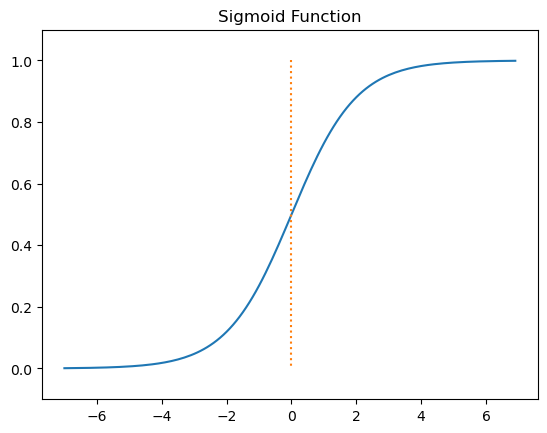

In [98]:
#Sigmoid 그래프로서 표현하기
x = np.arange(-7.0,7.0,0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,0.0],':')
plt.ylim(-0.1,1.1)
plt.title('Sigmoid Function')
plt.show()

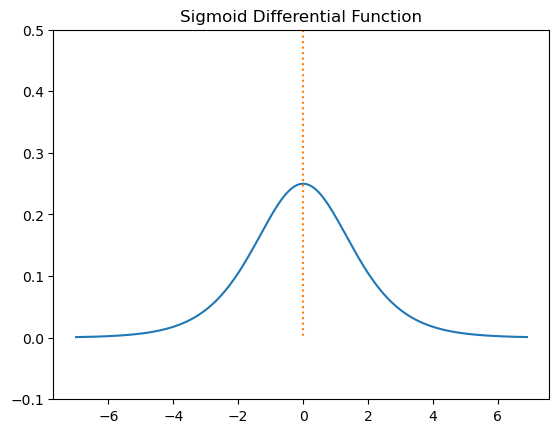

In [99]:
#Sigmoid 미분그래프로서 표현하기
x = np.arange(-7.0,7.0,0.1)
y = sigmoid_(x)

plt.plot(x,y)
plt.plot([0,0],[0.5,0.0],':')
plt.ylim(-0.1,0.5)
plt.title('Sigmoid Differential Function')
plt.show()

### [문제 6]

- $28 \times 28 \ $ MNIST data를 Classification하려고한다<br>
$ \ \ $ keras MNIST dataset을 이용하시오 <br>
- 최적화를 위한 조건<br>
$ \ \ $ $\checkmark \ $ Optimizer: Adam <br>
$ \ \ $ $\checkmark \ $ Loss function: sparse_categorical_crossentropy <br>
$ \ \ $ $\checkmark \ $ epoch 수: 10 <br>

- 다음과 같은 Layer를 가진 Network을 이용하여 Classification하시오

Layer | 설명
:----:|:----
1  | $\bullet \ $ Convolution <br> $\ \ $ $\checkmark \ $ $3 \times 3$ filter 16 <br> $\ \ $ $\checkmark \ $  Activation  ReLU <br> $\ \ $ $\checkmark \ $  $2 \times 2$ Maxpooling
2  | $\bullet \ $ Convolution <br> $\ \ $ $\checkmark \ $ $3 \times 3$ filter 16 <br> $\ \ $ $\checkmark \ $  Activation  ReLU <br> $\ \ $ $\checkmark \ $  $2 \times 2$ Maxpooling
3  | $\bullet \ $ Convolution <br> $\ \ $ $\checkmark \ $ $3 \times 3$ filter 32 <br> $\ \ $ $\checkmark \ $  Activation  ReLU <br> $\ \ $ $\checkmark \ $  $2 \times 2$ Maxpooling
4  | $\bullet \ $ Convolution <br> $\ \ $ $\checkmark \ $ $3 \times 3$ filter 32 <br> $\ \ $ $\checkmark \ $  Activation  ReLU <br> $\ \ $ $\checkmark \ $  $2 \times 2$ Maxpooling
5  | $\bullet \ $ Fully  Connected  <br> $\ \ $ $\checkmark \ $ input node 수는 convolution 결과에 의존 <br> $\ \ $ $\checkmark \ $  Activation  ReLU 
6  | $\bullet \ $ Fully  Connected  <br> $\ \ $ $\checkmark \ $ input node 수 32개 <br> $\ \ $ $\checkmark \ $  Activation  ReLU 
7  | $\bullet \ $ Fully  Connected  <br> $\ \ $ $\checkmark \ $ node 수 10개 <br> $\ \ $ $\checkmark \ $  Activation  Softmax

- 학습 후 Testdataset을 이용한 Loss function값과 Accuracy를 출력하시오

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
print(train_images.shape, test_images.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
    
    
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

loss, acc = model.evaluate(test_images, test_labels, verbose=2)

### [문제 7]

- 문제 6에서 test_images, test_labels를 이용하여 Confusion Matrix를 출력하고 의미를 간단히 설명하시오

* Confusion Matrix는 타겟의 원래 클래스와 모형이 예측한 클래스가 일치하는지를 개수로 센 결과를 표로 나타낸 것
* conf_mx를 설명해보면 (0,0)은 정답 클래스가 0, 예측 클래스가 0인 표본의 수라는 뜻
* 0을 0으로 예측한게 974개이고, 1로 예측한게 0개, 2로 예측한게 1개,...

In [54]:
test_predictions = model.predict(test_images)
test_predictions

array([[2.6387289e-08, 2.1241076e-06, 1.4263378e-07, ..., 9.9994540e-01,
        1.2549606e-09, 4.0712141e-05],
       [2.8886735e-10, 7.9886264e-10, 1.0000000e+00, ..., 4.0107651e-09,
        2.8748087e-08, 7.0628453e-10],
       [5.6740017e-05, 9.9987519e-01, 1.4944584e-06, ..., 3.6692640e-05,
        9.7726597e-06, 3.3916879e-06],
       ...,
       [4.9971000e-12, 1.7691592e-09, 9.8082348e-11, ..., 1.1652455e-10,
        7.5067957e-10, 4.3803002e-08],
       [8.7622361e-08, 8.8265599e-09, 3.0248040e-09, ..., 4.8325259e-09,
        3.6570425e-06, 2.8238432e-07],
       [1.1162899e-07, 4.6850067e-07, 5.7743688e-07, ..., 1.9516176e-13,
        2.5330951e-07, 1.4816856e-09]], dtype=float32)

In [55]:
test_predict = np.argmax(test_predictions, axis=1)
test_predict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [56]:
conf_mx = confusion_matrix(test_labels, test_predict)
conf_mx

array([[ 974,    0,    1,    0,    0,    0,    4,    1,    0,    0],
       [   4, 1119,    1,    2,    1,    1,    0,    7,    0,    0],
       [   0,    0, 1022,    2,    0,    0,    0,    4,    4,    0],
       [   0,    0,    0,  993,    0,   11,    0,    0,    4,    2],
       [   0,    0,    6,    0,  954,    0,    1,    1,    1,   19],
       [   0,    0,    0,    1,    0,  889,    2,    0,    0,    0],
       [   3,    2,    3,    0,    1,    8,  940,    0,    1,    0],
       [   1,    3,    5,    0,    0,    2,    0, 1009,    3,    5],
       [   2,    0,    5,    0,    1,    3,    0,    2,  960,    1],
       [   1,    0,    0,    0,    3,    8,    0,    2,    1,  994]],
      dtype=int64)